### LEAD CONVERSION

In [1]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing Libraries
import numpy as np
import pandas as pd

In [ ]:
## Reading Data

In [3]:
data = pd.read_csv('Leads.csv')

In [4]:
data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [5]:
data.shape

(9240, 37)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [ ]:
### Renaming Columns

In [7]:
data.columns = [
                    'prospect_id', 
                    'lead_number',
                    'lead_origin',
                    'lead_source',
                    'dont_email',
                    'dont_call',
                    'converted',
                    'total_visits',
                    'total_time_spent_website',
                    'page_views_visits',
                    'last_activity',
                    'country',
                    'specialization',
                    'hear_x_edu',
                    'occupation',
                    'course_matters',
                    'search',
                    'magazine',
                    'newspaper_article',
                    'x_edu_forums',
                    'news_paper',
                    'digital_advertisement',
                    'recommndations',
                    'receive_updates',
                    'tags',
                    'lead_quality',
                    'supply_chain_content',
                    'dm_content',
                    'lead_profile',
                    'city',
                    'aai',
                    'api',
                    'aas',
                    'aps',
                    'cheque_payment',
                    'free_copy',
                    'last_notable_activity'
                ]

In [8]:
data.head()

,prospect_id,lead_number,lead_origin,lead_source,dont_email,dont_call,converted,total_visits,total_time_spent_website,page_views_visits,...,dm_content,lead_profile,city,aai,api,aas,aps,cheque_payment,free_copy,last_notable_activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


### Checking for Outliers

In [9]:
data['course_matters'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: course_matters, dtype: int64

In [10]:
data.isnull().sum()

prospect_id                    0
lead_number                    0
lead_origin                    0
lead_source                   36
dont_email                     0
dont_call                      0
converted                      0
total_visits                 137
total_time_spent_website       0
page_views_visits            137
last_activity                103
country                     2461
specialization              1438
hear_x_edu                  2207
occupation                  2690
course_matters              2709
search                         0
magazine                       0
newspaper_article              0
x_edu_forums                   0
news_paper                     0
digital_advertisement          0
recommndations                 0
receive_updates                0
tags                        3353
lead_quality                4767
supply_chain_content           0
dm_content                     0
lead_profile                2709
city                        1420
aai       

In [11]:
data['specialization'].value_counts()

Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: specialization, dtype: int64

In [12]:
#data = data[~np.isnan(data['aas'])]

In [13]:
# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Checking for Missing Values

In [14]:
data['city'].value_counts()

Mumbai                         3222
Select                         2249
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: city, dtype: int64

In [15]:
## Select is missing value it should be replaced with NaN.

In [16]:
data['city'] = data['city'].apply(lambda x : x if x not in ['Select'] else np.NaN)

In [17]:
data['country'].value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malaysia      

In [18]:
data['country'] = data['country'].apply(lambda x : x if x in ['India', 'United States', 'United Arab Emirates', 'Singapore', 'Saudi Arabia', 'United Kingdom', 'Australia', 'Qatar'] else 'Others')

In [19]:
data['country'].value_counts()

India                   6492
Others                  2543
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Name: country, dtype: int64

In [20]:
data['occupation'].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: occupation, dtype: int64

In [21]:
data['hear_x_edu'].value_counts()

Select                   5043
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: hear_x_edu, dtype: int64

In [22]:
data['hear_x_edu'] = data['hear_x_edu'].apply(lambda x : x if x not in ['Select'] else np.NaN)

### Creating Categroical and Numerical columns

In [23]:
categorical_columns = []
numerical_columns = []

columns = data.columns

for ctg in columns:
    desc = data[ctg].describe()
   
    try: 
        if desc.dtype == 'object':
            categorical_columns.append(ctg)
        
        if desc.dtype == 'int64' or desc.dtype == 'float64':
            numerical_columns.append(ctg)
    
    except Exception as e:
        print(e)

        

categorical_columns
        

['prospect_id',
 'lead_origin',
 'lead_source',
 'dont_email',
 'dont_call',
 'last_activity',
 'country',
 'specialization',
 'hear_x_edu',
 'occupation',
 'course_matters',
 'search',
 'magazine',
 'newspaper_article',
 'x_edu_forums',
 'news_paper',
 'digital_advertisement',
 'recommndations',
 'receive_updates',
 'tags',
 'lead_quality',
 'supply_chain_content',
 'dm_content',
 'lead_profile',
 'city',
 'aai',
 'api',
 'cheque_payment',
 'free_copy',
 'last_notable_activity']

In [24]:
for ctg in categorical_columns:
    data[ctg] = data[ctg].apply(lambda x : np.NaN if x in ['Select'] else x)

In [25]:
for ctg in categorical_columns:
    if data[ctg].isnull().sum() > 0:
        top = data[ctg].describe().top
        data[ctg] = data[ctg].apply(lambda x : top if x is np.NaN else x)

In [26]:
data.isnull().sum()

prospect_id                    0
lead_number                    0
lead_origin                    0
lead_source                    0
dont_email                     0
dont_call                      0
converted                      0
total_visits                 137
total_time_spent_website       0
page_views_visits            137
last_activity                  0
country                        0
specialization                 0
hear_x_edu                     0
occupation                     0
course_matters                 0
search                         0
magazine                       0
newspaper_article              0
x_edu_forums                   0
news_paper                     0
digital_advertisement          0
recommndations                 0
receive_updates                0
tags                           0
lead_quality                   0
supply_chain_content           0
dm_content                     0
lead_profile                   0
city                           0
aai       

In [27]:
data[ np.isnan(data['aas']) == True ]

,prospect_id,lead_number,lead_origin,lead_source,dont_email,dont_call,converted,total_visits,total_time_spent_website,page_views_visits,...,dm_content,lead_profile,city,aai,api,aas,aps,cheque_payment,free_copy,last_notable_activity
963,59718980-d656-4415-baeb-c223ed6abe3a,649981,API,Organic Search,No,No,0,11.0,1166,2.20,...,No,Potential Lead,Mumbai,02.Medium,02.Medium,NaN,NaN,No,No,Page Visited on Website
1363,a8a1c41c-a21e-43bb-9120-444d79efff06,645610,API,Direct Traffic,No,No,0,4.0,446,1.33,...,No,Potential Lead,Mumbai,02.Medium,02.Medium,NaN,NaN,No,No,Email Opened
1388,a69a81be-f69a-45e0-9857-1f75ec740108,645388,API,Google,No,No,1,2.0,2020,2.00,...,No,Potential Lead,Mumbai,02.Medium,02.Medium,NaN,NaN,No,No,Email Opened
1401,4e5cae69-5632-4db3-af8f-7e1b2c9b552e,645333,API,Google,No,No,1,3.0,1459,3.00,...,No,Potential Lead,Mumbai,02.Medium,02.Medium,NaN,NaN,No,No,Email Opened
1513,14f31910-89a3-4f38-b803-dbb57999ae44,644225,API,Google,No,No,0,6.0,481,6.00,...,No,Potential Lead,Mumbai,02.Medium,02.Medium,NaN,NaN,No,No,Modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8849,a5ff2095-f1d4-40d6-b1cf-c0120d2fd3aa,582385,Landing Page Submission,Direct Traffic,No,No,0,9.0,83,3.00,...,No,Potential Lead,Mumbai,02.Medium,02.Medium,NaN,NaN,No,Yes,Email Opened
9183,bc77b8ab-253a-443d-802b-d023f8f44ef8,580017,API,Google,No,No,0,4.0,952,2.00,...,No,Potential Lead,Mumbai,02.Medium,02.Medium,NaN,NaN,No,No,Modified
9221,b92509cd-7f4c-414e-a8af-eb9cf0c89da7,579767,Landing Page Submission,Google,No,No,0,4.0,1347,2.00,...,No,Potential Lead,Mumbai,02.Medium,02.Medium,NaN,NaN,No,Yes,SMS Sent
9228,40d3b3cf-d939-49ff-bea5-60e8d4025104,579717,Landing Page Submission,Google,No,No,1,4.0,1944,2.00,...,No,Potential Lead,Mumbai,02.Medium,02.Medium,NaN,NaN,No,Yes,Modified


## Dropping columns with missing values

In [28]:
data.drop(['aas', 'aps'], axis = 1 , inplace = True)

In [29]:
data.head()

,prospect_id,lead_number,lead_origin,lead_source,dont_email,dont_call,converted,total_visits,total_time_spent_website,page_views_visits,...,lead_quality,supply_chain_content,dm_content,lead_profile,city,aai,api,cheque_payment,free_copy,last_notable_activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,Low in Relevance,No,No,Potential Lead,Mumbai,02.Medium,02.Medium,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,Might be,No,No,Potential Lead,Mumbai,02.Medium,02.Medium,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,Not Sure,No,No,Potential Lead,Mumbai,02.Medium,01.High,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,No,No,Modified


In [30]:
data.isnull().sum()

prospect_id                   0
lead_number                   0
lead_origin                   0
lead_source                   0
dont_email                    0
dont_call                     0
converted                     0
total_visits                137
total_time_spent_website      0
page_views_visits           137
last_activity                 0
country                       0
specialization                0
hear_x_edu                    0
occupation                    0
course_matters                0
search                        0
magazine                      0
newspaper_article             0
x_edu_forums                  0
news_paper                    0
digital_advertisement         0
recommndations                0
receive_updates               0
tags                          0
lead_quality                  0
supply_chain_content          0
dm_content                    0
lead_profile                  0
city                          0
aai                           0
api     

In [ ]:
### Dropping rows with null values

In [31]:
data = data[~np.isnan(data['total_visits'])]

In [32]:
data.isnull().sum()

prospect_id                 0
lead_number                 0
lead_origin                 0
lead_source                 0
dont_email                  0
dont_call                   0
converted                   0
total_visits                0
total_time_spent_website    0
page_views_visits           0
last_activity               0
country                     0
specialization              0
hear_x_edu                  0
occupation                  0
course_matters              0
search                      0
magazine                    0
newspaper_article           0
x_edu_forums                0
news_paper                  0
digital_advertisement       0
recommndations              0
receive_updates             0
tags                        0
lead_quality                0
supply_chain_content        0
dm_content                  0
lead_profile                0
city                        0
aai                         0
api                         0
cheque_payment              0
free_copy 

In [33]:
data['lead_source'].value_counts()

Google               2897
Direct Traffic       2543
Olark Chat           1753
Organic Search       1154
Reference             443
Welingak Website      129
Referral Sites        125
Facebook               31
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: lead_source, dtype: int64

In [34]:
data['lead_source'] = data['lead_source'].apply(lambda x : x if x in ['Google', 'Direct Traffic', 'Olark Chat', 'Organic Search', 'Reference', 'Welingak Website', 'Referral Sites', 'Facebook' ] else 'Others')

In [35]:
data['last_activity'].value_counts()

Email Opened                    3437
SMS Sent                        2738
Olark Chat Conversation          972
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    312
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       90
Unsubscribed                      61
Had a Phone Conversation          25
View in browser link Clicked       6
Approached upfront                 5
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: last_activity, dtype: int64

In [36]:
data['last_activity'] = data['last_activity'].apply(lambda x : x if x in ['Email Opened', 'SMS Sent', 'Olark Chat Conversation', 'Page Visited on Website', 'Converted to Lead', 'Email Bounced', 'Email Link Clicked', 'Form Submitted on Website', 'Unreachable' , 'Unsubscribed'  ] else 'Others')

In [37]:
data['last_notable_activity'].value_counts()

Modified                        3270
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Resubscribed to emails             1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Name: last_notable_activity, dtype: int64

In [38]:
data.isnull().sum()

prospect_id                 0
lead_number                 0
lead_origin                 0
lead_source                 0
dont_email                  0
dont_call                   0
converted                   0
total_visits                0
total_time_spent_website    0
page_views_visits           0
last_activity               0
country                     0
specialization              0
hear_x_edu                  0
occupation                  0
course_matters              0
search                      0
magazine                    0
newspaper_article           0
x_edu_forums                0
news_paper                  0
digital_advertisement       0
recommndations              0
receive_updates             0
tags                        0
lead_quality                0
supply_chain_content        0
dm_content                  0
lead_profile                0
city                        0
aai                         0
api                         0
cheque_payment              0
free_copy 

### Mapping Yes/No variables to 1/0

In [39]:

varlist = [  
                'dont_email',
                'dont_call',
                'search',
                'magazine',
                'newspaper_article',
                'x_edu_forums',
                'news_paper',
                'digital_advertisement',
                'recommndations',
                'receive_updates',
                'supply_chain_content',
                'dm_content',
                'cheque_payment',
                'free_copy'
          ]


def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

data[varlist] = data[varlist].apply(binary_map)


In [40]:
data.isnull().sum()

prospect_id                 0
lead_number                 0
lead_origin                 0
lead_source                 0
dont_email                  0
dont_call                   0
converted                   0
total_visits                0
total_time_spent_website    0
page_views_visits           0
last_activity               0
country                     0
specialization              0
hear_x_edu                  0
occupation                  0
course_matters              0
search                      0
magazine                    0
newspaper_article           0
x_edu_forums                0
news_paper                  0
digital_advertisement       0
recommndations              0
receive_updates             0
tags                        0
lead_quality                0
supply_chain_content        0
dm_content                  0
lead_profile                0
city                        0
aai                         0
api                         0
cheque_payment              0
free_copy 

In [41]:
data.head()

,prospect_id,lead_number,lead_origin,lead_source,dont_email,dont_call,converted,total_visits,total_time_spent_website,page_views_visits,...,lead_quality,supply_chain_content,dm_content,lead_profile,city,aai,api,cheque_payment,free_copy,last_notable_activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,0,0.0,...,Low in Relevance,0,0,Potential Lead,Mumbai,02.Medium,02.Medium,0,0,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5.0,674,2.5,...,Might be,0,0,Potential Lead,Mumbai,02.Medium,02.Medium,0,0,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,...,Might be,0,0,Potential Lead,Mumbai,02.Medium,01.High,0,1,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,...,Not Sure,0,0,Potential Lead,Mumbai,02.Medium,01.High,0,0,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,...,Might be,0,0,Potential Lead,Mumbai,02.Medium,01.High,0,0,Modified


In [ ]:
## Converting categorical variable to numerical variable

In [42]:

#/*

try:
    m2 = pd.get_dummies(data['lead_source'], prefix='lead_source')
    data = pd.concat([data,m2], axis=1)
    data = data.drop(['lead_source', 'lead_source_Google'], axis = 1)
except Exception as e:
    print(e)
    

try:
    m3 = pd.get_dummies(data['lead_profile'], prefix='lead_profile')
    data = pd.concat([data,m3], axis=1)
    data = data.drop(['lead_profile', 'lead_profile_Potential Lead'], axis = 1)
except Exception as e:
    print(e)


try:
    m4 = pd.get_dummies(data['city'], prefix='city')
    data = pd.concat([data,m4], axis=1)
    data = data.drop(['city', 'city_Mumbai'], axis = 1)
except Exception as e:
    print(e)


try:
    m5 = pd.get_dummies(data['aai'], prefix='aai')
    data = pd.concat([data,m5], axis=1)
    data = data.drop(['aai', 'aai_02.Medium'], axis = 1)
except Exception as e:
    print(e)


try:
    m6 = pd.get_dummies(data['api'], prefix='api')
    data = pd.concat([data,m6], axis=1)
    data = data.drop(['api', 'api_02.Medium'], axis = 1)
except Exception as e:
    print(e)


try:
    m7 = pd.get_dummies(data['lead_origin'], prefix='lead_origin')
    data = pd.concat([data,m7], axis=1)
    data = data.drop(['lead_origin', 'lead_origin_API'], axis = 1)
except Exception as e:
    print(e)


try:
    m8 = pd.get_dummies(data['last_activity'], prefix='last_activity')
    data = pd.concat([data,m8], axis=1)
    data = data.drop(['last_activity', 'last_activity_Email Opened'], axis = 1)
except Exception as e:
    print(e)


try:
    m9 = pd.get_dummies(data['specialization'], prefix='specialization')
    data = pd.concat([data,m9], axis=1)
    data = data.drop(['specialization', 'specialization_Finance Management'], axis = 1)
except Exception as e:
    print(e)    
    
try:
    m10 = pd.get_dummies(data['country'], prefix='country')
    data = pd.concat([data,m10], axis=1)
    data = data.drop(['country', 'country_India'], axis = 1)
except Exception as e:
    print(e)

    
try:
    m10 = pd.get_dummies(data['occupation'], prefix='occupation')
    data = pd.concat([data,m10], axis=1)
    data = data.drop(['occupation', 'occupation_Unemployed'], axis = 1)
except Exception as e:
    print(e)

    
try:
    m10 = pd.get_dummies(data['course_matters'], prefix='course_matters')
    data = pd.concat([data,m10], axis=1)
    data = data.drop(['course_matters', 'course_matters_Better Career Prospects'], axis = 1)
except Exception as e:
    print(e)

    
try:
    m10 = pd.get_dummies(data['hear_x_edu'], prefix='hear_x_edu')
    data = pd.concat([data,m10], axis=1)
    data = data.drop(['hear_x_edu', 'hear_x_edu_Online Search'], axis = 1)
except Exception as e:
    print(e)
    

try:
    m10 = pd.get_dummies(data['tags'], prefix='tags')
    data = pd.concat([data,m10], axis=1)
    data = data.drop(['tags', 'tags_Ringing'], axis = 1)
except Exception as e:
    print(e)

    
    
try:
    m10 = pd.get_dummies(data['last_notable_activity'], prefix='last_notable_activity')
    data = pd.concat([data,m10], axis=1)
    data = data.drop(['last_notable_activity', 'last_notable_activity_Email Opened'], axis = 1)
except Exception as e:
    print(e)

    
try:
    m10 = pd.get_dummies(data['lead_quality'], prefix='lead_quality')
    data = pd.concat([data,m10], axis=1)
    data = data.drop(['lead_quality', 'lead_quality_Might be'], axis = 1)
except Exception as e:
    print(e)
    


#*/

In [43]:
data.head()

,prospect_id,lead_number,dont_email,dont_call,converted,total_visits,total_time_spent_website,page_views_visits,search,magazine,...,last_notable_activity_Page Visited on Website,last_notable_activity_Resubscribed to emails,last_notable_activity_SMS Sent,last_notable_activity_Unreachable,last_notable_activity_Unsubscribed,last_notable_activity_View in browser link Clicked,lead_quality_High in Relevance,lead_quality_Low in Relevance,lead_quality_Not Sure,lead_quality_Worst
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,0,0,0,0.0,0,0.0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,0,0,0,5.0,674,2.5,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,0,0,1,2.0,1532,2.0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,0,0,0,1.0,305,1.0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,0,0,1,2.0,1428,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
data.columns

Index(['prospect_id', 'lead_number', 'dont_email', 'dont_call', 'converted',
       'total_visits', 'total_time_spent_website', 'page_views_visits',
       'search', 'magazine',
       ...
       'last_notable_activity_Page Visited on Website',
       'last_notable_activity_Resubscribed to emails',
       'last_notable_activity_SMS Sent', 'last_notable_activity_Unreachable',
       'last_notable_activity_Unsubscribed',
       'last_notable_activity_View in browser link Clicked',
       'lead_quality_High in Relevance', 'lead_quality_Low in Relevance',
       'lead_quality_Not Sure', 'lead_quality_Worst'],
      dtype='object', length=138)

In [45]:
from sklearn.model_selection import train_test_split

In [ ]:
## Removing unnecessary column lead_number

In [46]:
data = data.drop('lead_number', axis = 1)

In [47]:
data

,prospect_id,dont_email,dont_call,converted,total_visits,total_time_spent_website,page_views_visits,search,magazine,newspaper_article,...,last_notable_activity_Page Visited on Website,last_notable_activity_Resubscribed to emails,last_notable_activity_SMS Sent,last_notable_activity_Unreachable,last_notable_activity_Unsubscribed,last_notable_activity_View in browser link Clicked,lead_quality_High in Relevance,lead_quality_Low in Relevance,lead_quality_Not Sure,lead_quality_Worst
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,0,0,0,0.0,0,0.00,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,0,0,0,5.0,674,2.50,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,0,0,1,2.0,1532,2.00,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,0,0,0,1.0,305,1.00,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,3256f628-e534-4826-9d63-4a8b88782852,0,0,1,2.0,1428,1.00,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,19d6451e-fcd6-407c-b83b-48e1af805ea9,1,0,1,8.0,1845,2.67,0,0,0,...,0,0,0,0,0,0,1,0,0,0
9236,82a7005b-7196-4d56-95ce-a79f937a158d,0,0,0,2.0,238,2.00,0,0,0,...,0,0,1,0,0,0,0,0,0,0
9237,aac550fe-a586-452d-8d3c-f1b62c94e02c,1,0,0,2.0,199,2.00,0,0,0,...,0,0,1,0,0,0,0,0,1,0
9238,5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9,0,0,1,3.0,499,3.00,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [ ]:
## Dropping convrted and prospect_id 

In [49]:
X = data.drop(['converted', 'prospect_id'], axis=1)
X.head()

,dont_email,dont_call,total_visits,total_time_spent_website,page_views_visits,search,magazine,newspaper_article,x_edu_forums,news_paper,...,last_notable_activity_Page Visited on Website,last_notable_activity_Resubscribed to emails,last_notable_activity_SMS Sent,last_notable_activity_Unreachable,last_notable_activity_Unsubscribed,last_notable_activity_View in browser link Clicked,lead_quality_High in Relevance,lead_quality_Low in Relevance,lead_quality_Not Sure,lead_quality_Worst
0,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,2.0,1532,2.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,2.0,1428,1.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [50]:
y = data['converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: converted, dtype: int64

In [51]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [53]:
from sklearn.preprocessing import StandardScaler

In [54]:

try:
    numerical_columns.remove('lead_number')
except Exception as e:
    print(e)

    
try:    
    numerical_columns.remove('converted')
except Exception as e:
    print(e)

    
try:
    numerical_columns.remove('aas')
except Exception as e:
    print(e)

    
try:    
    numerical_columns.remove('aps')
except Exception as e:
    print(e)



In [55]:
numerical_columns

['total_visits', 'total_time_spent_website', 'page_views_visits']

In [56]:
scaler = StandardScaler()
X_train[numerical_columns] = scaler.fit_transform(X_train[numerical_columns])
X_train.head()

,dont_email,dont_call,total_visits,total_time_spent_website,page_views_visits,search,magazine,newspaper_article,x_edu_forums,news_paper,...,last_notable_activity_Page Visited on Website,last_notable_activity_Resubscribed to emails,last_notable_activity_SMS Sent,last_notable_activity_Unreachable,last_notable_activity_Unsubscribed,last_notable_activity_View in browser link Clicked,lead_quality_High in Relevance,lead_quality_Low in Relevance,lead_quality_Not Sure,lead_quality_Worst
7962,0,0,-0.092900,1.476324,-0.394072,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
5520,0,0,0.695064,-0.771066,2.111481,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1962,0,0,0.301082,-0.571257,0.061483,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1566,0,0,2.074000,1.393834,0.517039,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9170,0,0,-0.683873,-0.881052,-1.077404,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [80]:
#X_train.replace([np.inf, -np.inf], np.nan, inplace=True)

In [59]:
#X_train = clean_dataset(X_train)

In [57]:
X_train.head()

,dont_email,dont_call,total_visits,total_time_spent_website,page_views_visits,search,magazine,newspaper_article,x_edu_forums,news_paper,...,last_notable_activity_Page Visited on Website,last_notable_activity_Resubscribed to emails,last_notable_activity_SMS Sent,last_notable_activity_Unreachable,last_notable_activity_Unsubscribed,last_notable_activity_View in browser link Clicked,lead_quality_High in Relevance,lead_quality_Low in Relevance,lead_quality_Not Sure,lead_quality_Worst
7962,0,0,-0.092900,1.476324,-0.394072,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
5520,0,0,0.695064,-0.771066,2.111481,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1962,0,0,0.301082,-0.571257,0.061483,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1566,0,0,2.074000,1.393834,0.517039,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9170,0,0,-0.683873,-0.881052,-1.077404,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [58]:
columns = X_train.columns

for cl in columns:
    if X_train[cl].describe().dtype != 'float64':
        print(X_train[cl].describe())
        print('\n\n')

In [59]:
# Let's see the correlation matrix 
#plt.figure(figsize = (20,10))        # Size of the figure
#sns.heatmap(data.corr(),annot = True)
#plt.show()

In [60]:
X_train.isnull().sum()

dont_email                                            0
dont_call                                             0
total_visits                                          0
total_time_spent_website                              0
page_views_visits                                     0
                                                     ..
last_notable_activity_View in browser link Clicked    0
lead_quality_High in Relevance                        0
lead_quality_Low in Relevance                         0
lead_quality_Not Sure                                 0
lead_quality_Worst                                    0
Length: 135, dtype: int64

In [61]:
import statsmodels.api as sm

In [62]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6243
Model Family:                Binomial   Df Model:                          128
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Thu, 08 Sep 2022   Deviance:                       71564.
Time:                        19:50:10   Pearson chi2:                 3.50e+18
No. Iterations:                    84                                         
Covariance Type:            nonrobust                                         
==========================================================================================================================
                                                             coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
const                                                  -1.359e+15   3.53e+06  -3.85e+08      0.000   -1.36e+15   -1.36e+15
dont_email                                             -3.848e+14   4.46e+06  -8.62e+07      0.000   -3.85e+14   -3.85e+14
dont_call                                               3.755e+15   4.79e+07   7.84e+07      0.000    3.75e+15    3.75e+15
total_visits                                             2.61e+13   1.02e+06   2.56e+07      0.000    2.61e+13    2.61e+13
total_time_spent_website                                6.303e+13   1.02e+06   6.18e+07      0.000     6.3e+13     6.3e+13
page_views_visits                                      -2.747e+13   1.22e+06  -2.25e+07      0.000   -2.75e+13   -2.75e+13
search                                                 -1.496e+14   2.24e+07   -6.7e+06      0.000    -1.5e+14    -1.5e+14
magazine                                                  18.8978   5.94e-07   3.18e+07      0.000      18.898      18.898
newspaper_article                                      -2.209e+15   4.25e+07   -5.2e+07      0.000   -2.21e+15   -2.21e+15
x_edu_forums                                           -2.209e+15   4.25e+07   -5.2e+07      0.000   -2.21e+15   -2.21e+15
news_paper                                             -3.038e+15   6.73e+07  -4.51e+07      0.000   -3.04e+15   -3.04e+15
digital_advertisement                                   4.268e+14   3.92e+07   1.09e+07      0.000    4.27e+14    4.27e+14
recommndations                                          7.737e+14   3.16e+07   2.45e+07      0.000    7.74e+14    7.74e+14
receive_updates                                            4.1606   3.22e-07   1.29e+07      0.000       4.161       4.161
supply_chain_content                                      25.0115   5.22e-07   4.79e+07      0.000      25.011      25.011
dm_content                                               -17.0768    2.8e-07   -6.1e+07      0.000     -17.077     -17.077
cheque_payment                                            23.2014   2.55e-07    9.1e+07      0.000      23.201      23.201
free_copy                                              -6.966e+12   2.84e+06  -2.46e+06      0.000   -6.97e+12   -6.97e+12
lead_source_Direct Traffic                              2.451e+13   2.94e+06   8.34e+06      0.000    2.45e+13    2.45e+13
lead_source_Facebook                                   -1.173e+15      5e+07  -2.35e+07      0.000   -1.17e+15   -1.17e+15
lead_source_Olark Chat                                  3.771e+14   5.67e+06   6.65e+07      0.000    3.77e+14    3.77e+14
lead_source_Organic Search                              1.875e+13   3.18e+06    5.9e+06      0.000    1.87e+13    1.87e+13
lead_sou

In [63]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [64]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [65]:
rfe.support_

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
        True, False, False, False, False, False, False, False,  True,
       False, False, False,  True, False, False, False, False, False,
       False,  True, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False,  True,  True, False, False, False, False, False,
       False,  True,  True, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False,

In [66]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('dont_email', False, 7),
 ('dont_call', False, 59),
 ('total_visits', False, 76),
 ('total_time_spent_website', False, 13),
 ('page_views_visits', False, 81),
 ('search', False, 97),
 ('magazine', False, 121),
 ('newspaper_article', False, 72),
 ('x_edu_forums', False, 70),
 ('news_paper', False, 85),
 ('digital_advertisement', False, 93),
 ('recommndations', False, 78),
 ('receive_updates', False, 118),
 ('supply_chain_content', False, 116),
 ('dm_content', False, 117),
 ('cheque_payment', False, 119),
 ('free_copy', False, 109),
 ('lead_source_Direct Traffic', False, 100),
 ('lead_source_Facebook', False, 84),
 ('lead_source_Olark Chat', False, 89),
 ('lead_source_Organic Search', False, 90),
 ('lead_source_Others', False, 112),
 ('lead_source_Reference', False, 49),
 ('lead_source_Referral Sites', False, 74),
 ('lead_source_Welingak Website', True, 1),
 ('lead_profile_Dual Specialization Student', False, 22),
 ('lead_profile_Lateral Student', False, 10),
 ('lead_profile_Other Lead

In [67]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('dont_email', False, 7),
 ('dont_call', False, 59),
 ('total_visits', False, 76),
 ('total_time_spent_website', False, 13),
 ('page_views_visits', False, 81),
 ('search', False, 97),
 ('magazine', False, 121),
 ('newspaper_article', False, 72),
 ('x_edu_forums', False, 70),
 ('news_paper', False, 85),
 ('digital_advertisement', False, 93),
 ('recommndations', False, 78),
 ('receive_updates', False, 118),
 ('supply_chain_content', False, 116),
 ('dm_content', False, 117),
 ('cheque_payment', False, 119),
 ('free_copy', False, 109),
 ('lead_source_Direct Traffic', False, 100),
 ('lead_source_Facebook', False, 84),
 ('lead_source_Olark Chat', False, 89),
 ('lead_source_Organic Search', False, 90),
 ('lead_source_Others', False, 112),
 ('lead_source_Reference', False, 49),
 ('lead_source_Referral Sites', False, 74),
 ('lead_source_Welingak Website', True, 1),
 ('lead_profile_Dual Specialization Student', False, 22),
 ('lead_profile_Lateral Student', False, 10),
 ('lead_profile_Other Lead

In [68]:
X_train.columns[~rfe.support_]

Index(['dont_email', 'dont_call', 'total_visits', 'total_time_spent_website',
       'page_views_visits', 'search', 'magazine', 'newspaper_article',
       'x_edu_forums', 'news_paper',
       ...
       'last_notable_activity_Had a Phone Conversation',
       'last_notable_activity_Olark Chat Conversation',
       'last_notable_activity_Page Visited on Website',
       'last_notable_activity_Resubscribed to emails',
       'last_notable_activity_SMS Sent', 'last_notable_activity_Unreachable',
       'last_notable_activity_Unsubscribed',
       'last_notable_activity_View in browser link Clicked',
       'lead_quality_Not Sure', 'lead_quality_Worst'],
      dtype='object', length=120)

In [69]:
col = X_train.columns[rfe.support_]

In [70]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6356
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1782.7
Date:                Thu, 08 Sep 2022   Deviance:                       3565.5
Time:                        19:51:21   Pearson chi2:                 2.06e+04
No. Iterations:                    20                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -5.0011      0.176    -28.366      0.000      -5.347      -4.656
lead_source_Welingak Website                 2.4146      0.797      3.031      0.002       0.853       3.976
lead_profile_Other Leads                     1.7678      0.261      6.783      0.000       1.257       2.279
aai_03.Low                                  -1.6388      0.361     -4.535      0.000      -2.347      -0.930
lead_origin_Lead Add Form                    1.5046      0.307      4.896      0.000       0.902       2.107
last_activity_Others                         2.2405      0.628      3.570      0.000       1.010       3.471
last_activity_SMS Sent                       2.2347      0.093     23.918      0.000       2.052       2.418
occupation_Working Professional              2.6699      0.250     10.690      0.000       2.180       3.159
tags_Busy                                    3.8565      0.263     14.651      0.000       3.341       4.372
tags_Closed by Horizzon                      9.0933      0.755     12.051      0.000       7.614      10.572
tags_Lateral student                        24.5676   1.46e+04      0.002      0.999   -2.86e+04    2.86e+04
tags_Lost to EINS                           10.1193      0.752     13.459      0.000       8.646      11.593
tags_Will revert after reading the email     4.2045      0.170     24.733      0.000       3.871       4.538
last_notable_activity_Modified              -1.5602      0.099    -15.683      0.000      -1.755      -1.365
lead_quality_High in Relevance               3.9838      0.347     11.480      0.000       3.304       4.664
lead_quality_Low in Relevance                3.0833      0.220     14.044      0.000       2.653       3.514
============================================================================================================
"""

In [71]:
col

Index(['lead_source_Welingak Website', 'lead_profile_Other Leads',
       'aai_03.Low', 'lead_origin_Lead Add Form', 'last_activity_Others',
       'last_activity_SMS Sent', 'occupation_Working Professional',
       'tags_Busy', 'tags_Closed by Horizzon', 'tags_Lateral student',
       'tags_Lost to EINS', 'tags_Will revert after reading the email',
       'last_notable_activity_Modified', 'lead_quality_High in Relevance',
       'lead_quality_Low in Relevance'],
      dtype='object')

In [72]:
cols = ['tags_Lateral student']

for cl in cols:

    try:
        col = col.drop(cl)
    except Exception as e:
        print(e)

In [73]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6357
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1789.4
Date:                Thu, 08 Sep 2022   Deviance:                       3578.7
Time:                        19:51:27   Pearson chi2:                 2.06e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -4.9562      0.173    -28.600      0.000      -5.296      -4.617
lead_source_Welingak Website                 2.3586      0.796      2.962      0.003       0.798       3.919
lead_profile_Other Leads                     1.7440      0.259      6.740      0.000       1.237       2.251
aai_03.Low                                  -1.6444      0.361     -4.557      0.000      -2.352      -0.937
lead_origin_Lead Add Form                    1.5605      0.307      5.082      0.000       0.959       2.162
last_activity_Others                         2.2363      0.626      3.571      0.000       1.009       3.464
last_activity_SMS Sent                       2.2395      0.093     24.007      0.000       2.057       2.422
occupation_Working Professional              2.6600      0.249     10.691      0.000       2.172       3.148
tags_Busy                                    3.8093      0.261     14.577      0.000       3.297       4.321
tags_Closed by Horizzon                      9.0344      0.754     11.984      0.000       7.557      10.512
tags_Lost to EINS                           10.0653      0.751     13.400      0.000       8.593      11.537
tags_Will revert after reading the email     4.1547      0.167     24.901      0.000       3.828       4.482
last_notable_activity_Modified              -1.5483      0.099    -15.607      0.000      -1.743      -1.354
lead_quality_High in Relevance               4.0279      0.345     11.681      0.000       3.352       4.704
lead_quality_Low in Relevance                3.0697      0.218     14.063      0.000       2.642       3.498
============================================================================================================
"""

In [74]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

7962    0.061995
5520    0.241041
1962    0.013858
1566    0.865110
9170    0.006990
5097    0.309691
8954    0.061995
309     0.309691
5519    0.808141
1050    0.961815
dtype: float64

In [75]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.06199537, 0.24104078, 0.0138576 , 0.86510974, 0.00699017,
       0.30969133, 0.06199537, 0.30969133, 0.80814139, 0.96181464])

In [76]:
y_train_pred_final = pd.DataFrame({'converted':y_train.values, 'converted_prob':y_train_pred})
y_train_pred_final['ID'] = y_train.index
y_train_pred_final.head()

,converted,converted_prob,ID
0,0,0.061995,7962
1,0,0.241041,5520
2,0,0.013858,1962
3,1,0.865110,1566
4,0,0.006990,9170


In [77]:
y_train_pred_final['predicted'] = y_train_pred_final.converted_prob.map(lambda x: 1 if x > 0.5 else 0)

y_train_pred_final.head()

,converted,converted_prob,ID,predicted
0,0,0.061995,7962,0
1,0,0.241041,5520,0
2,0,0.013858,1962,0
3,1,0.865110,1566,1
4,0,0.006990,9170,0


In [78]:
from sklearn import metrics

In [79]:
confusion = metrics.confusion_matrix(y_train_pred_final.converted, y_train_pred_final.predicted )
print(confusion)

[[3801  152]
 [ 506 1913]]


In [80]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.converted, y_train_pred_final.predicted))

0.8967357187696171


In [81]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [82]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,tags_Closed by Horizzon,1.41
0,lead_source_Welingak Website,1.36
7,tags_Busy,1.05
2,aai_03.Low,1.04
9,tags_Lost to EINS,1.04
4,last_activity_Others,1.02
3,lead_origin_Lead Add Form,0.67
6,occupation_Working Professional,0.55
12,lead_quality_High in Relevance,0.53
13,lead_quality_Low in Relevance,0.35


In [83]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,converted,converted_prob,ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.061995,7962,0,1,0,0,0,0,0,0,0,0,0
1,0,0.241041,5520,0,1,1,1,0,0,0,0,0,0,0
2,0,0.013858,1962,0,1,0,0,0,0,0,0,0,0,0
3,1,0.865110,1566,1,1,1,1,1,1,1,1,1,1,0
4,0,0.006990,9170,0,1,0,0,0,0,0,0,0,0,0


In [84]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.379630  1.000000  0.000000
0.1   0.1  0.799435  0.945845  0.709841
0.2   0.2  0.803045  0.944605  0.716418
0.3   0.3  0.808067  0.938404  0.728308
0.4   0.4  0.884338  0.819347  0.924108
0.5   0.5  0.896736  0.790823  0.961548
0.6   0.6  0.895951  0.786689  0.962813
0.7   0.7  0.889360  0.768086  0.963572
0.8   0.8  0.886221  0.748243  0.970655
0.9   0.9  0.802888  0.489045  0.994941


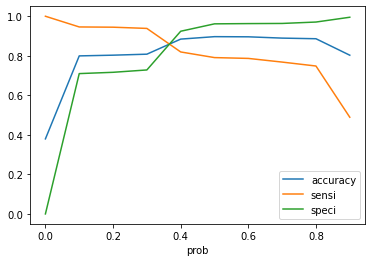

In [85]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [ ]:
### Cutoff 0.36

In [86]:
y_train_pred_final['final_predicted'] = y_train_pred_final.converted_prob.map( lambda x: 1 if x > 0.36 else 0)

y_train_pred_final.head()

,converted,converted_prob,ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.061995,7962,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.241041,5520,0,1,1,1,0,0,0,0,0,0,0,0
2,0,0.013858,1962,0,1,0,0,0,0,0,0,0,0,0,0
3,1,0.865110,1566,1,1,1,1,1,1,1,1,1,1,0,1
4,0,0.006990,9170,0,1,0,0,0,0,0,0,0,0,0,0


In [87]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.converted, y_train_pred_final.final_predicted)

0.8851224105461394

In [88]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.converted, y_train_pred_final.final_predicted )
confusion2

array([[3649,  304],
       [ 428, 1991]], dtype=int64)

### Making prediction on the test set

In [89]:
X_test[numerical_columns] = scaler.transform(X_test[numerical_columns])

In [90]:
X_test = X_test[col]
X_test.head()

,lead_source_Welingak Website,lead_profile_Other Leads,aai_03.Low,lead_origin_Lead Add Form,last_activity_Others,last_activity_SMS Sent,occupation_Working Professional,tags_Busy,tags_Closed by Horizzon,tags_Lost to EINS,tags_Will revert after reading the email,last_notable_activity_Modified,lead_quality_High in Relevance,lead_quality_Low in Relevance
3504,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4050,0,0,0,1,0,1,0,0,0,0,1,0,1,0
7201,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1196,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8219,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [91]:
X_test_sm = sm.add_constant(X_test)

In [92]:
y_test_pred = res.predict(X_test_sm)

In [93]:
y_test_pred[:10]

3504    0.006990
4050    0.999113
7201    0.061995
1196    0.006990
8219    0.993994
8747    0.309691
9048    0.309691
6524    0.001494
7693    0.061995
8187    0.239367
dtype: float64

In [94]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [95]:
# Let's see the head
y_pred_1.head()

,0
3504,0.006990
4050,0.999113
7201,0.061995
1196,0.006990
8219,0.993994


In [96]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [97]:
# Putting CustID to index
y_test_df['ID'] = y_test_df.index

In [98]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [99]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [100]:
y_pred_final.head()

,converted,ID,0
0,0,3504,0.006990
1,1,4050,0.999113
2,0,7201,0.061995
3,0,1196,0.006990
4,1,8219,0.993994


In [101]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'converted_prob'})

In [102]:
# Rearranging the columns
# y_pred_final = y_pred_final.reindex_axis(['ID','converted','converted_prob'], axis=1)

In [103]:
y_pred_final['final_predicted'] = y_pred_final.converted_prob.map(lambda x: 1 if x > 0.36 else 0)

In [104]:
y_pred_final.head()

,converted,ID,converted_prob,final_predicted
0,0,3504,0.006990,0
1,1,4050,0.999113,1
2,0,7201,0.061995,0
3,0,1196,0.006990,0
4,1,8219,0.993994,1
